In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn import datasets, svm
import seaborn as sns

In [3]:
# In order gain more intuition about how we are splitting our grid: we'll build the plot_estimator 

def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    # ? 
    x_min, x_max =X[:,0].min() -1, X[:,0].max() +.1
    y_min, y_max =X[:,1].min() -1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z= estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z=Z.reshape (xx.shape)
    plt.figure(figsize=(12,12))
    plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1], c=y)

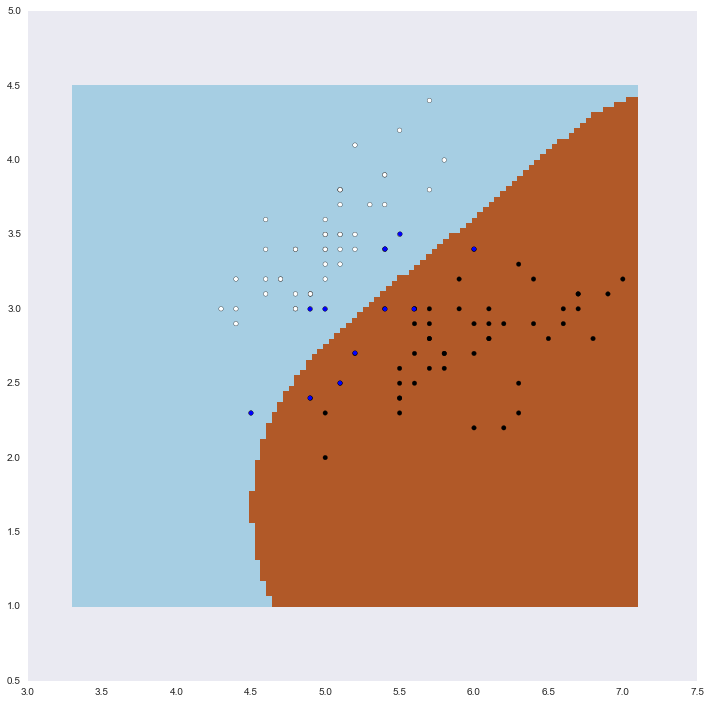

In [28]:
# Visualizing our Support Vectors and C (bias)

# Note that svm.LinearSVC uses the one vs. all methodology 
# where SVC implements one vs one 

iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=2,:2] 
y = iris.target[y!=2]

svc = svm.SVC(kernel='rbf', C=3).fit(X, y)
#svc = svm.LinearSVC(C=1).fit(X, y)
plot_estimator(svc,X,y)
# and then plot actually data points
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

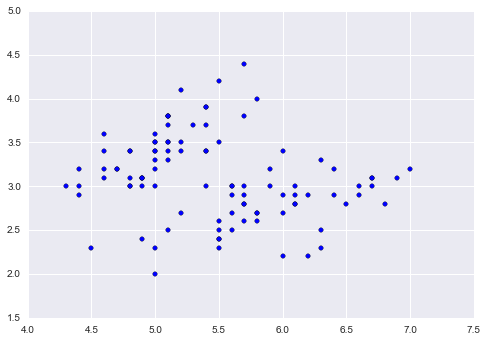

In [22]:
plt.scatter(X[:,0],X[:,1])

array([ 3.5,  3. ,  3.2,  3.1,  3.6,  3.9,  3.4,  3.4,  2.9,  3.1,  3.7,
        3.4,  3. ,  3. ,  4. ,  4.4,  3.9,  3.5,  3.8,  3.8,  3.4,  3.7,
        3.6,  3.3,  3.4,  3. ,  3.4,  3.5,  3.4,  3.2,  3.1,  3.4,  4.1,
        4.2,  3.1,  3.2,  3.5,  3.1,  3. ,  3.4,  3.5,  2.3,  3.2,  3.5,
        3.8,  3. ,  3.8,  3.2,  3.7,  3.3,  3.2,  3.2,  3.1,  2.3,  2.8,
        2.8,  3.3,  2.4,  2.9,  2.7,  2. ,  3. ,  2.2,  2.9,  2.9,  3.1,
        3. ,  2.7,  2.2,  2.5,  3.2,  2.8,  2.5,  2.8,  2.9,  3. ,  2.8,
        3. ,  2.9,  2.6,  2.4,  2.4,  2.7,  2.7,  3. ,  3.4,  3.1,  2.3,
        3. ,  2.5,  2.6,  3. ,  2.6,  2.3,  2.7,  3. ,  2.9,  2.9,  2.5,
        2.8])

In [27]:
svc.score

<bound method SVC.score of SVC(C=3, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>